<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-your-TensorFlow-version" data-toc-modified-id="Check-your-TensorFlow-version-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check your TensorFlow version</a></span></li><li><span><a href="#Generate-training-data" data-toc-modified-id="Generate-training-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate training data</a></span></li><li><span><a href="#Define-a-TF-model" data-toc-modified-id="Define-a-TF-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define a TF model</a></span></li><li><span><a href="#Create-an-instance-of-a-model-and-use-it" data-toc-modified-id="Create-an-instance-of-a-model-and-use-it-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create an instance of a model and use it</a></span></li><li><span><a href="#Define-a-loss" data-toc-modified-id="Define-a-loss-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define a loss</a></span></li><li><span><a href="#Define-a-training-function" data-toc-modified-id="Define-a-training-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Define a training function</a></span></li><li><span><a href="#Training-of-the-model" data-toc-modified-id="Training-of-the-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training of the model</a></span></li><li><span><a href="#Comparison-of-found-model-parameters-and-ground-truth" data-toc-modified-id="Comparison-of-found-model-parameters-and-ground-truth-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparison of found model parameters and ground truth</a></span></li></ul></div>

The code here is inspired by the following blog post:
    
https://heartbeat.fritz.ai/linear-regression-using-tensorflow-2-0-1cd51e211e1f

# Check your TensorFlow version

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0


# Generate training data

In [3]:
import numpy as np
nr_points = 120
np.random.normal(0,1, (nr_points))

array([-0.45802116,  1.8980094 , -1.06008221,  0.38617257, -0.85410791,
       -0.89330023, -2.32605885, -0.08522412, -0.65086292,  1.86554412,
       -0.44892383, -0.58251438, -1.95004564, -0.51943911,  0.58921875,
       -1.77421737, -1.80354811,  0.49698576, -1.30861729,  1.66676593,
        0.39672227, -0.78990903,  2.6227375 ,  1.00364499, -0.17458908,
       -0.49085467,  1.64563065, -2.09316869, -0.63341989,  0.25221324,
       -1.41608255,  0.54061383, -0.80670689,  0.31932743, -0.48601646,
        0.66971501,  0.64583833,  0.13726136,  1.49825779, -0.65640913,
       -0.15070544,  0.7461766 , -1.98113315,  0.48419023, -0.65770374,
       -0.7387513 ,  0.94777088, -0.7446918 , -0.35956139,  0.42073642,
       -0.15884393, -0.48144672, -0.10288143,  0.22331865, -2.42066723,
       -0.41226916,  1.11597765,  1.42494007,  0.83060854, -0.25876151,
        1.38705812,  1.46571147, -0.05651865, -1.10231484, -1.98066065,
       -0.63931513, -2.2277866 , -0.34385781,  0.6864289 , -1.47

In [4]:
TRUE_SLOPE = 2.0
TRUE_INTERCEPT = 0.9

x = np.linspace(0, 10, nr_points)
y = TRUE_SLOPE * x + TRUE_INTERCEPT + np.random.normal(0,1, (nr_points)) * 2.0

In [5]:
type(x)

numpy.ndarray

In [6]:
x.shape

(120,)

In [7]:
y.shape

(120,)

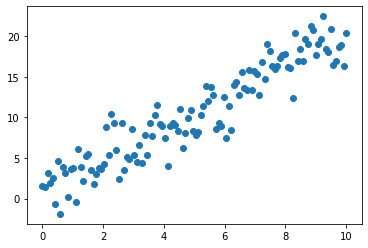

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

# Define a TF model

In [10]:
class LinearModel:
    
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(42.0)
        self.Bias = tf.Variable(1.234)

What is the magic method `__call__()` good for?

In [11]:
class test:
    
    def __call__(self,x):
        return x**3

In [12]:
t = test()

In [13]:
t(2)

8

# Create an instance of a model and use it

... without having learned the weights!

Training of the model parameters will be shown later!

In [14]:
my_model = LinearModel()

In [15]:
preds = my_model(x)

In [16]:
type(preds)

tensorflow.python.framework.ops.EagerTensor

In [17]:
preds

<tf.Tensor: id=19, shape=(120,), dtype=float32, numpy=
array([  1.234    ,   4.7634115,   8.292824 ,  11.822236 ,  15.351647 ,
        18.881058 ,  22.410471 ,  25.939882 ,  29.469294 ,  32.998707 ,
        36.52812  ,  40.05753  ,  43.586945 ,  47.116356 ,  50.645767 ,
        54.17518  ,  57.70459  ,  61.234    ,  64.76341  ,  68.29282  ,
        71.822235 ,  75.35165  ,  78.88106  ,  82.41047  ,  85.93989  ,
        89.46929  ,  92.99871  ,  96.528114 , 100.05753  , 103.586945 ,
       107.116356 , 110.64577  , 114.17518  , 117.70459  , 121.234    ,
       124.76341  , 128.29282  , 131.82222  , 135.35164  , 138.88104  ,
       142.41046  , 145.93987  , 149.46928  , 152.9987   , 156.5281   ,
       160.05753  , 163.58693  , 167.11635  , 170.64577  , 174.17517  ,
       177.70457  , 181.234    , 184.76341  , 188.29282  , 191.82222  ,
       195.35164  , 198.88106  , 202.41046  , 205.93988  , 209.46928  ,
       212.9987   , 216.5281   , 220.05753  , 223.58693  , 227.11635  ,
       23

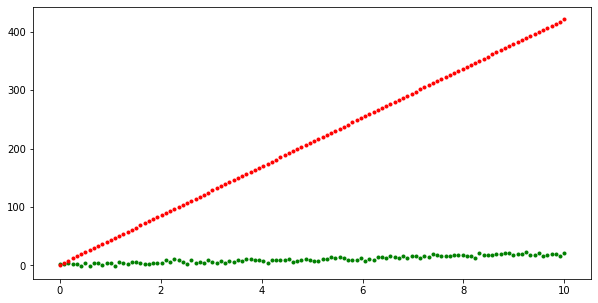

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.scatter(x,y,     color="green", marker=".", label="teacher values")
plt.scatter(x,preds, color="red",   marker=".", label="predictions")
plt.show()

# Define a loss

In [19]:
def loss(y, pred):
    """
    compute the loss of the model
    
    here it is defined as the mean
    squared error (MSE)
    """
    return tf.reduce_mean(tf.square(y - pred))

# Define a training function

For TensorFlow to be able to automatically compute the gradient of a loss function with respect to the model parameters (here: `linear_model.Weight` and `linear_model.Bias`), we need to know which tensor ops were computed.

These operations are recorded on a gradient tape using a `tf.GradientTape()` context manager:

In [21]:
def train(linear_model, x, y, lr=0.12):
    """
    Train the model using backpropagation
    
    Given a model linear_model and an input
    x and a desired output y, we
    1. do one forward step
    2. retrieve the gradient of the loss function
       with respect to the model parameters
    3. do a step in to the negative direction
       of the gradient (multiplied by the
       learning rate lr), i.e., do gradient descent
    """
    
    # 1. 
    # Compute the loss
    # This indirectly induces the computation
    # the output of the model by
    # linear_model(x)
    # which is implemented by the __call__()
    # function
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    # 2.
    # Automatically compute the gradient
    # of the loss with respect to the
    # two model parameters
    dloss_dweight, dloss_dbias = \
        t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    
    # 3.
    # Do gradient descent
    
    # Weight -= lr * dloss_dweight        
    linear_model.Weight.assign_sub(lr * dloss_dweight)  
    # Bias -= lr * dloss_dbias
    linear_model.Bias.assign_sub  (lr * dloss_dbias)

# Training of the model

In [22]:
linear_model = LinearModel()
Weights, Biases, Losses = [], [], []
epochs = 2000
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    Losses.append(real_loss)
    
    train(linear_model, x, y, lr=0.02)
    if epoch_count % 10 == 0:
        print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 53885.33984375
Epoch count 10: Loss value: 10.687844276428223
Epoch count 20: Loss value: 9.557897567749023
Epoch count 30: Loss value: 8.63199234008789
Epoch count 40: Loss value: 7.873201370239258
Epoch count 50: Loss value: 7.251363277435303
Epoch count 60: Loss value: 6.741757869720459
Epoch count 70: Loss value: 6.324130058288574
Epoch count 80: Loss value: 5.981879711151123
Epoch count 90: Loss value: 5.7014007568359375
Epoch count 100: Loss value: 5.47154426574707
Epoch count 110: Loss value: 5.283174991607666
Epoch count 120: Loss value: 5.1288042068481445
Epoch count 130: Loss value: 5.002295017242432
Epoch count 140: Loss value: 4.898618698120117
Epoch count 150: Loss value: 4.81365442276001
Epoch count 160: Loss value: 4.744026184082031
Epoch count 170: Loss value: 4.686964511871338
Epoch count 180: Loss value: 4.640202045440674
Epoch count 190: Loss value: 4.601878643035889
Epoch count 200: Loss value: 4.5704731941223145
Epoch count 210: Loss valu

Epoch count 1760: Loss value: 4.427872657775879
Epoch count 1770: Loss value: 4.427872657775879
Epoch count 1780: Loss value: 4.427872657775879
Epoch count 1790: Loss value: 4.427872657775879
Epoch count 1800: Loss value: 4.427872657775879
Epoch count 1810: Loss value: 4.427872657775879
Epoch count 1820: Loss value: 4.427872657775879
Epoch count 1830: Loss value: 4.427872657775879
Epoch count 1840: Loss value: 4.427872657775879
Epoch count 1850: Loss value: 4.427872657775879
Epoch count 1860: Loss value: 4.427872657775879
Epoch count 1870: Loss value: 4.427872657775879
Epoch count 1880: Loss value: 4.427872657775879
Epoch count 1890: Loss value: 4.427872657775879
Epoch count 1900: Loss value: 4.427872657775879
Epoch count 1910: Loss value: 4.427872657775879
Epoch count 1920: Loss value: 4.427872657775879
Epoch count 1930: Loss value: 4.427872657775879
Epoch count 1940: Loss value: 4.427872657775879
Epoch count 1950: Loss value: 4.427872657775879
Epoch count 1960: Loss value: 4.42787265

# Comparison of found model parameters and ground truth

In [23]:
TRUE_SLOPE

2.0

In [24]:
TRUE_INTERCEPT

0.9

In [25]:
Weights[-1]

1.9408172

In [26]:
Biases[-1]

0.822814

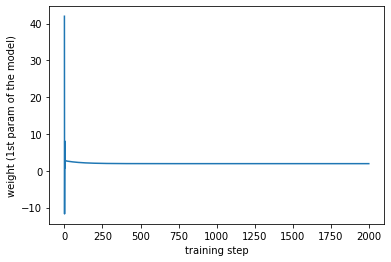

In [29]:
plt.plot(Weights)
plt.xlabel("training step")
plt.ylabel("weight (1st param of the model)")
plt.show()

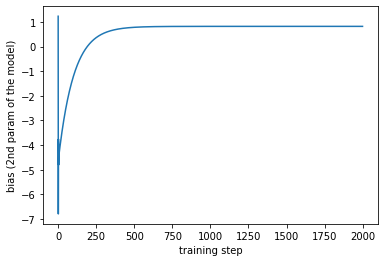

In [30]:
plt.plot(Biases)
plt.xlabel("training step")
plt.ylabel("bias (2nd param of the model)")
plt.show()